In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
plt.rcParams['figure.figsize']  = (14, 8)
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [55]:
df_yield = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/yield.csv?token=AKCY5EMQEPS5O7SS4AXLHGTA3TMZ2%27').drop(columns='Unnamed: 0')
df_yield.head()

,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),...,Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
0,Sorghum,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wheat,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sorghum,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wheat,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sorghum,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_yield['Year'] = df_yield['Year'].astype(str)
df_yield.dtypes

Grain                          object
Year                           object
Alta Floresta D'Oeste (RO)    float64
Ariquemes (RO)                float64
Cabixi (RO)                   float64
                               ...   
Vianópolis (GO)               float64
Vicentinópolis (GO)           float64
Vila Boa (GO)                 float64
Vila Propício (GO)            float64
Brasília (DF)                 float64
Length: 5565, dtype: object

In [57]:
df_yield_per_grain = df_yield.drop(columns='Year').groupby(['Grain']).sum().copy()
df_yield_per_grain.head()



,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),Espigão D'Oeste (RO),Guajará-Mirim (RO),...,Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
Grain,,,,,,,,,,,,,,,,,,,,,
Barley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,11.622335,0.000000,0.000000,0.000000,21.720910
Beans,24.182118,17.401048,13.497687,26.095462,19.900345,21.640738,15.558336,17.429007,19.957611,23.140943,...,20.148841,53.631953,15.859905,1.666667,14.47317,69.922711,91.221057,27.440000,9.124603,72.793029
Fava Beans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Maize,62.034577,75.682469,83.765463,65.992940,95.061732,98.118698,77.530256,52.821642,73.408437,67.365249,...,132.326073,170.176592,187.527102,17.907692,133.63787,213.447007,187.736971,97.116667,82.975323,203.166836
Oats,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.600000


In [58]:
df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

In [59]:
for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].mean()
df_yield_per_grain['Total']

Grain
Barley         2.405093
Beans         24.352761
Fava Beans     1.657449
Maize         85.566299
Oats           3.334667
Pea            1.331244
Rye            0.568755
Sorghum        7.888625
Soybeans      27.677082
Wheat         11.307436
Name: Total, dtype: float64

<AxesSubplot:title={'center':'Produção por grão'}, xlabel='Grain'>

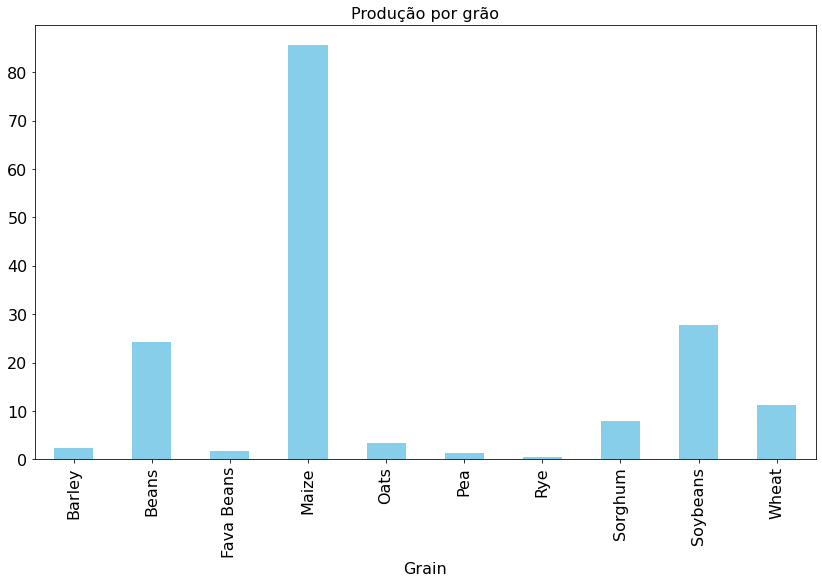

In [60]:
df_yield_per_grain['Total'].plot.bar(x='Grain', title='Produção por grão', color='skyblue')

In [61]:
df_yield_per_grain_per_year = df_yield.groupby(['Grain', 'Year']).sum().copy()
df_yield_per_grain_per_year.head()

Alta Floresta D'Oeste (RO)  Ariquemes (RO)  Cabixi (RO)  \
Grain  Year                                                            
Barley 1974                         0.0             0.0          0.0   
       1975                         0.0             0.0          0.0   
       1976                         0.0             0.0          0.0   
       1977                         0.0             0.0          0.0   
       1978                         0.0             0.0          0.0   

             Cacoal (RO)  Cerejeiras (RO)  Colorado do Oeste (RO)  \
Grain  Year                                                         
Barley 1974          0.0              0.0                     0.0   
       1975          0.0              0.0                     0.0   
       1976          0.0              0.0                     0.0   
       1977          0.0              0.0                     0.0   
       1978          0.0              0.0                     0.0   

             Corumbiara (RO)  Costa Marques (RO)  Espigão D'Oeste (RO)  \
Grain  Year                                                              
Barley 1974              0.0                 0.0                   0.0   
       1975              0.0                 0.0                   0.0   
       1976              0.0                 0.0                   0.0   
       1977              0.0                 0.0                   0.0   
       1978              0.0                 0.0                   0.0   

             Guajará-Mirim (RO)  ...  Uruaçu (GO)  Uruana (GO)  Urutaí (GO)  \
Grain  Year                      ...                                          
Barley 1974                 0.0  ...          0.0          0.0          0.0   
       1975                 0.0  ...          0.0          0.0          0.0   
       1976                 0.0  ...          0.0          0.0          0.0   
       1977                 0.0  ...          0.0          0.0          0.0   
       1978                 0.0  ...          0.0          0.0          0.0   

             Valparaíso de Goiás (GO)  Varjão (GO)  Vianópolis (GO)  \
Grain  Year                                                           
Barley 1974                       0.0          0.0              0.0   
       1975                       0.0          0.0              0.0   
       1976                       0.0          0.0              0.0   
       1977                       0.0          0.0              0.0   
       1978                       0.0          0.0              0.0   

             Vicentinópolis (GO)  Vila Boa (GO)  Vila Propício (GO)  \
Grain  Year                                                           
Barley 1974                  0.0            0.0                 0.0   
       1975                  0.0            0.0                 0.0   
       1976                  0.0            0.0                 0.0   
       1977                  0.0            0.0                 0.0   
       1978                  0.0            0.0                 0.0   

             Brasília (DF)  
Grain  Year                 
Barley 1974            0.0  
       1975            0.0  
       1976            0.0  
       1977            0.0  
       1978            0.0  

[5 rows x 5563 columns]

In [62]:
df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)
df_yield_per_grain_per_year['Total'].head()

Grain   Year
Barley  1974    101.149147
        1975    110.788449
        1976    129.867100
        1977    135.328915
        1978    196.981601
Name: Total, dtype: float64

<AxesSubplot:xlabel='Year'>

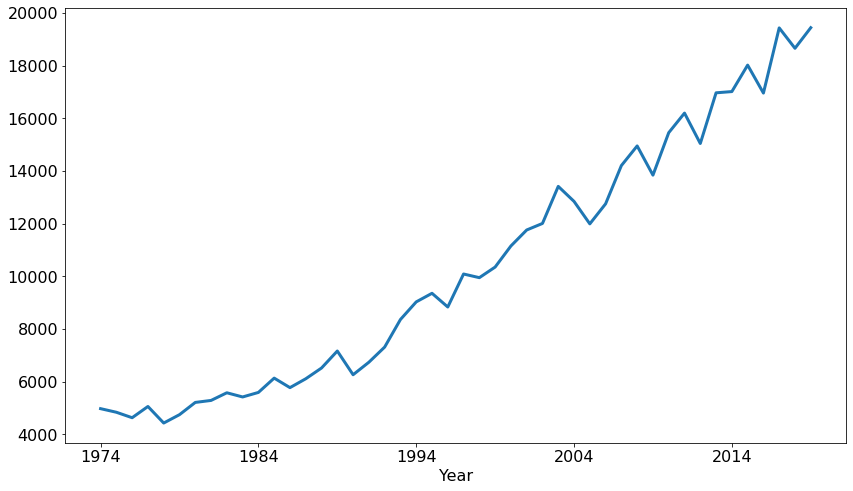

In [63]:
df_yield_per_grain_per_year['Total'].loc['Maize'].plot.line()

([<matplotlib.axis.XTick at 0x7f2b7ff1af10>,
 [Text(0, 0, '1974'),
  Text(10, 0, '1984'),
  Text(20, 0, '1994'),
  Text(30, 0, '2004'),
  Text(40, 0, '2014'),
  Text(45, 0, '2019')])

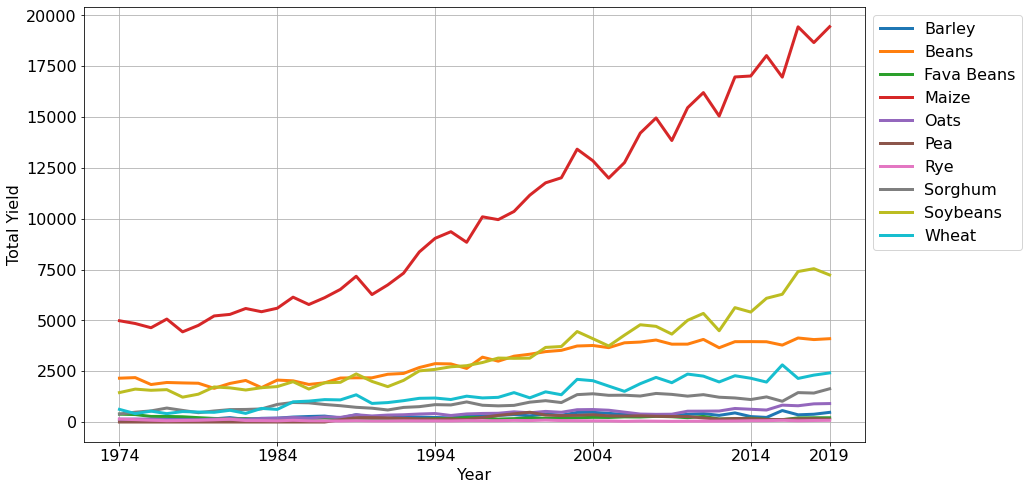

In [64]:
df_yield_per_grain_per_year.groupby('Grain')['Total'].plot(legend=True, xlabel='Year', ylabel='Total Yield', grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks([0,10,20,30,40,45], [1974, 1984, 1994, 2004, 2014,2019])
#como deixar o eixo x com os anos??

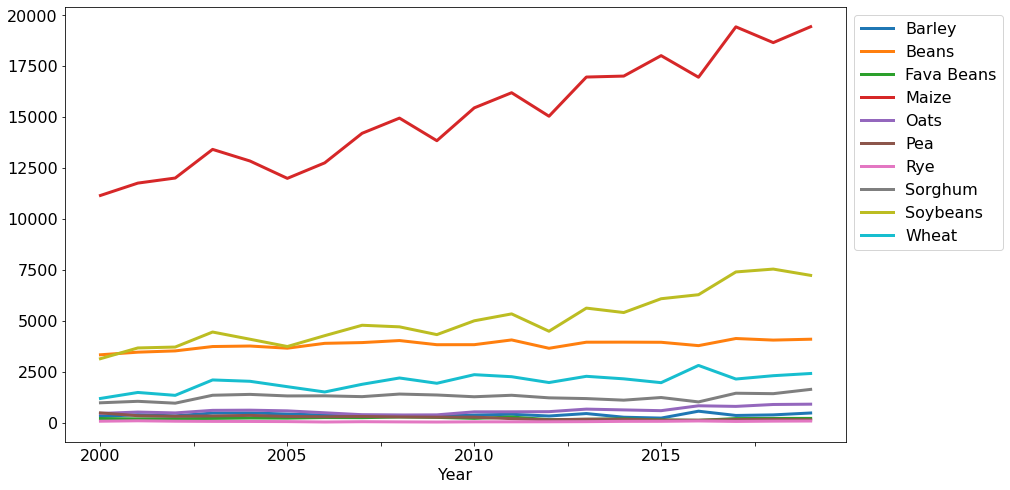

In [65]:
df_yield_per_grain_per_year[df_yield_per_grain_per_year.index.get_level_values('Year') >= '2000']['Total'].unstack(level=0).plot(kind='line', subplots=False)
plt.legend(bbox_to_anchor=(1,1))

In [66]:
df_yield.loc[(df_yield['Year'] == 2018) & (df_yield['Grain'] == 'Soybeans')].drop(columns='Year').sum(axis=1)

Series([], dtype: float64)

In [67]:
df_yield.loc[(df_yield['Year'] == 2018) & (df_yield['Grain'] == 'Beans')].drop(columns='Year').sum(axis=1)

Series([], dtype: float64)

In [68]:
df_yield.loc[(df_yield['Year'] == 2005) & (df_yield['Grain'] == 'Beans')].drop(columns='Year').sum(axis=1)

Series([], dtype: float64)